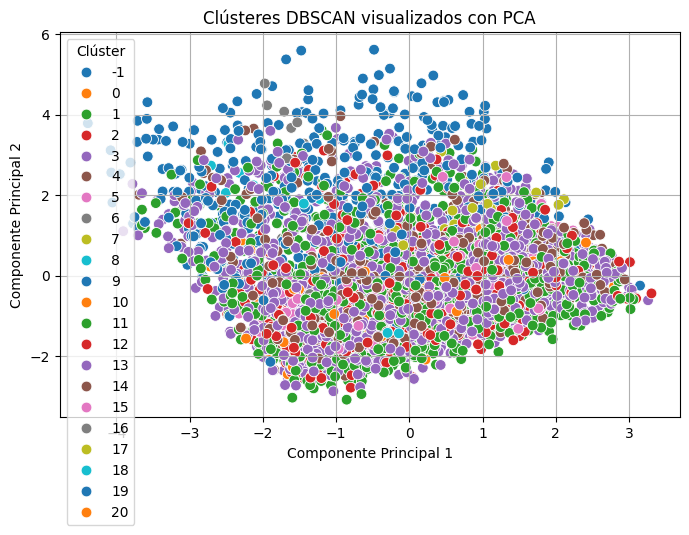


📊 Resumen promedio por clúster:
                  ID        Age  Experience      Income      ZIP Code  \
Cluster                                                                 
0        2482.391753  45.577320   20.061856   51.154639  92825.587629   
1        2516.364592  45.140663   19.925627   70.505255  93100.928052   
2        2598.962264  45.069182   19.846960   64.058700  93148.446541   
3        2505.178749  45.386829   20.140011   70.915329  93189.035971   
4        2504.973312  45.857143   20.616954   64.687598  93151.083203   
5        2398.306748  45.312883   20.030675   58.552147  93239.638037   
6        1859.000000  46.285714   21.714286  152.142857  93689.142857   
7        2790.708333  56.083333   31.166667   44.416667  93554.291667   
8        2180.000000  36.714286   11.571429  149.714286  93700.857143   
9        2176.636364  52.272727   27.272727  114.545455  93734.636364   
10       1440.000000  59.000000   33.600000   43.400000  91782.400000   
11       1456.6000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# ------------------------------
# 1. Cargar datos
# ------------------------------
df = pd.read_csv('Marketing.csv')

# ------------------------------
# 2. Preprocesamiento
# ------------------------------
columns_to_drop = ['ID', 'ZIP Code', 'Personal Loan']
df_clustering = df.drop(columns=columns_to_drop)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clustering)

# ------------------------------
# 3. DBSCAN
# ------------------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)  # puedes ajustar estos valores
df['Cluster'] = dbscan.fit_predict(data_scaled)

# ------------------------------
# 4. Visualización con PCA
# ------------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=df['Cluster'],
    palette='tab10',
    s=60
)
plt.title('Clústeres DBSCAN visualizados con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster', loc='best')
plt.grid(True)
plt.show()

# ------------------------------
# 5. Resumen de clústeres (ignorar ruido si lo deseas)
# ------------------------------
print("\n📊 Resumen promedio por clúster:")
cluster_summary = df[df['Cluster'] != -1].groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# ------------------------------
# 6. Leyenda interpretativa por clúster
# ------------------------------
print("\n📌 Leyenda interpretativa (basada en promedios):")
for cluster_id, row in cluster_summary.iterrows():
    descripcion = []
    if row['Income'] > df['Income'].mean():
        descripcion.append("ingresos altos")
    else:
        descripcion.append("ingresos bajos")

    if row['Education'] >= 2:
        descripcion.append("nivel educativo alto")
    else:
        descripcion.append("nivel educativo bajo")

    if row['Online'] > 0.5:
        descripcion.append("uso frecuente de banca online")

    if row['CreditCard'] > 0.5:
        descripcion.append("uso frecuente de tarjeta de crédito")

    if row['Mortgage'] > 100:
        descripcion.append("hipotecas elevadas")

    if row['CCAvg'] > 2:
        descripcion.append("alto consumo con tarjeta")

    leyenda = ", ".join(descripcion)
    print(f"Clúster {cluster_id}: {leyenda}")

# ------------------------------
# 7. Revisar puntos marcados como ruido
# ------------------------------
n_ruido = (df['Cluster'] == -1).sum()
print(f"\n❗ Ruido detectado (puntos no asignados a ningún clúster): {n_ruido}")

